## D214 Capstone: Time Series Forecasting in Processor Core Count
##### Submitted By Edwin Perry
### Table of Contents
<ol>
    <li><a href="#A">Research Question</a></li>
    <li><a href="#B">Data Collection</a></li>
    <li><a href="#C">Data Extraction and Preparation</a></li>
    <li><a href="#D">Analysis</a></li>
    <li><a href="#E">Data Summary and Implications</a></li>
    <li><a href="#F">Sources</a></li>
</ol>
<h4 id="A">Research Question</h4>
<p>The research question I decided to investigate for this project is "Can a time-series analysis be used to accurately predict the increase in processor cores based solely on publicly available data?" <br />
Processing power is increasingly relevant, as technology becomes more complex and requires more resources to operate. The number of cores is one key metric in determining a processor's capacity, as more cores allows for a greater degree of parallel processing and multithreading. Furthermore, the materials used to produce these processors is incredibly difficult to acquire, so being able to forecast the necessity of these materials through understanding how core usage increases would be valuable to any entity through which processor materials may be sourced. <br />
Intel and AMD, two of the largest processor manufacturers, make public certain pieces of information regarding their processors, such as time of release and number of cores. With this information, we can attempt to build a predictive model that will be able to chart the projected growth of cores in computer processors. This type of analysis will be useful to a number of businesses. Any business using high-end, complex technologies such as generative AI can benefit from the ability to forecast the increase in computational power, allowing these businesses to scale their technology as more powerful resources become available. Businesses providing the raw materials can utilize the forecasted increase of cores to project how quickly resources will need to be harvested for use over the course of time. Even the producers of the processors could use this information to understand the power new processors would be expected to have, helping the processor manufacturers to establish benchmark growth standards in the quality of processors produced. <br />
This analysis will utilize a null and alternate hypothesis to analyze the results. The hypotheses are as follows:
<ul>
<li>Null Hypothesis: The ARIMA analysis produced by the model will not be sufficiently accurate in determining core count in processors with a mean absolute percent error below 15%</li>
<li>Alternate Hypothesis: The ARIMA analysis produced by the model will be sufficiently accurate in determining core count in processors with a mean absolute percent error below 15%</li>
</ul>
</p>
<h4 id="B">Data Collection</h4>
<p>The data for this project was sourced from a <a href='https://www.kaggle.com/datasets/alanjo/amd-processor-specifications/data?select=INTELpartialspecs_adjusted.csv'>publicly available Kaggle dataset</a>. This page compiled data from both AMD and Intel into tabular structures for the purpose of analytics. The tables contain information that covers a time span of 1999-2022, and is available in 2 distinct csv files. There are a total 3342 rows, each representing a different processor created. The dataset documents the following values:
<ul>
<li>product: The name of the processor</li>
<li>releaseDate: The year that the processor was launched</li>
<li># cores: The number of cores the processor has</li>
<li># threads: The number of threads the processor can handle</li>
<li># maxTurboClock: The maximum clock speed of the processor, in gigaherts</li>
<li># baseClock: The base clock speed of the processor, in gigaherts</li>
<li># cache: The memory cache size of the processor, in megabytes</li>
<li>cacheInfo: The type of cache that the processor uses</li>
<li># TDP: The thermal design power, in Watts</li>
<li># lith: The lithography of the processor, in nanometers</li>
<li>status: The current status of processor manufacturing</li>
<li>IntegratedG: Model of integrated graphics card, if any</li>
</ul>
The data will be dowloaded in 2 csv files, then ingested using the read_csv function, which adds the data into a dataframe. The tables will then be concatenated to each other to create one comprehensive dataframe containing all of the relevant data.<br />
The primary disadvantage of performing the data analysis with this dataset is the limited amount of different values in the releaseDate column. If we had a greater number of years, or if the releaseDate column contained month as well as year, then we would have a larger amount of data to utilize for the purpose of this analysis. Instead, we will have 23 different years to look at, with no ability to break the data into smaller pieces on the basis of quarter, month, or date. As such, we may not be able to sufficiently account for the variability of the data. <br />
The primary advantage of this data collection and analysis is the simplicity of the analysis, allowing for even non-technical individuals to understand the process simply. The process consists of downloading csv files, loading them into virtual tables (in a dataframe), and combining the data. This is an easily replicated process, whereby anyone can download the data and perform the same steps, enabling others to validate the results of the data collection process. There are alternatives involving APIs or using external databases that can make the data collection aspect more difficult to understand, but that is not the case with this analysis.</p>
<h4 id="C">Data Extraction and Preparation</h4>
<p>This process will be performed using the Python programming language within a Jupyter Notebook. I am using Python because it is a simple, easy to understand language with useful libraries that are perfectly suited for this type of analysis. Jupyter Notebooks are useful because it allows the code to be created and executed in an environment that contains textual breakdowns and explanations of the code being used.<br />
As part of the data extraction and preparation, we will first import the necessary packages and load the dataset into the Python environment. We will remove duplicate entries to ensure that no processor is double-counted. Next, we will handle any missing values in the release year and number of cores columns. We will then drop all unnecessary columns, keeping only release year and number of cores for analysis, and combine the dataframes into one. After this, we will aggregate the data by computing the yearly median core count, ensuring that there is only one representative value per year.
Once the data is structured, we will perform exploratory data analysis (EDA) to assess trends, seasonality, and stationarity in the dataset. This will involve visualizing the time series, checking for exponential growth, and performing an Augmented Dickey-Fuller (ADF) test to determine whether the data is stationary. If non-stationarity is detected, we will apply differencing to remove trends and prepare the data for ARIMA modeling. Finally, we will split the data into training and testing sets, representing 80% and 20% of the dataset respectively<br />
One advantage of this process will be to thoroughly, numerically, and visually confirm that the data is fully usable without issue in this analysis. We are accounting for every possible issue regarding the data formatting, cleansing, and preparation, meaning that, though we can't be certain that the model will be successful in its analysis, we can be confident that we have maximized the use of the available data, and therefore, if the model does not function, it is because the data does not make it possible in any way to create a successful, accurate model. <br />
A disadvantage of this process is that we lose context that may be able to explain differences in these trends. For example, if there is a year where the manufacturers focused on increasing the cache size and maximum clock speed, rather than increasing the core count, the data would not be able to reflect this information once the preparation is complete. <br />
The first step of the data extraction/preparation will be to create the import statements, so that we have access to the libraries and packages that will be necessary for this analysis. These libraries and packages are as follows:
<ul>
<li>Pandas: Used for data ingestion and manipulation in the useful dataframe object</li>
<li>Matplotlib: Used for data visualization</li>
<li>NumPy: Used to simply perform complex mathematical operations</li>
<li>SciKitLearn: To split the data into testing and training sets, as well as calculating mean absolute percent error</li>
<li>StatsModels: Used to decompose the data and create the ARIMA model</li>
</ul>
Below, we see the importation of these libraries:</p>

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

<p>The next step is data ingestion. We are going to import both of the csv files into their own dataframes:</p>

In [534]:
amd_df = pd.read_csv('~/Downloads/AMDfullspecs_adjusted.csv')
intel_df = pd.read_csv('~/Downloads/INTELpartialspecs_adjusted.csv')

<p>The next step is to validate the data, such that there are no duplicate entries in either dataframe. This will ensure that no processor in the dataset is double counted, which would reduce the validity of the data. We will also drop any rows missing values for release date and number of cores</p>

In [535]:
# Remove duplicate rows
amd_df = amd_df.drop_duplicates()
intel_df = intel_df.drop_duplicates()

# Drop N/A values in relevant columns
amd_df = amd_df.dropna(subset=['launchDate', 'numCores'])
intel_df = intel_df.dropna(subset=['releaseDate', 'cores'])

<p>The next step is to drop the irrelevant columns, then combine the dataframes. This also requires ensuring the columns have the same names, so we will rename the amd_df columns to match the intel_df column names.</p>

In [536]:
amd_df.rename(columns={'launchDate': 'releaseDate', 'numCores': 'cores'}, inplace=True)
amd_df = amd_df[['releaseDate', 'cores']]
intel_df = intel_df[['releaseDate', 'cores']]
combined_df = pd.concat([amd_df, intel_df], ignore_index=True)
combined_df['releaseDate'] = pd.to_datetime(combined_df['releaseDate'], format='%Y')
combined_df['releaseDate'] = combined_df['releaseDate'].dt.to_period('Y').dt.start_time

<p>Now, we need to aggregate the data, such that we get the median for each year.</p>

In [537]:
yearly_med_cores = combined_df.groupby('releaseDate')['cores'].median().reset_index()
yearly_med_cores.rename(columns={'releaseDate': 'Year', 'cores': 'MedianCores'}, inplace=True)
print(yearly_med_cores)

         Year  MedianCores
0  1999-01-01          1.0
1  2000-01-01          1.0
2  2001-01-01          1.0
3  2002-01-01          1.0
4  2003-01-01          1.0
5  2004-01-01          1.0
6  2005-01-01          1.0
7  2006-01-01          2.0
8  2007-01-01          2.0
9  2008-01-01          2.0
10 2009-01-01          4.0
11 2010-01-01          2.0
12 2011-01-01          2.0
13 2012-01-01          4.0
14 2013-01-01          2.0
15 2014-01-01          4.0
16 2015-01-01          4.0
17 2016-01-01          4.0
18 2017-01-01          4.0
19 2018-01-01          4.0
20 2019-01-01          6.0
21 2020-01-01          6.0
22 2021-01-01          8.0
23 2022-01-01          8.0


<p>Next, we will perform the EDA to attempt to identify the seasonality or trends of the data</p>

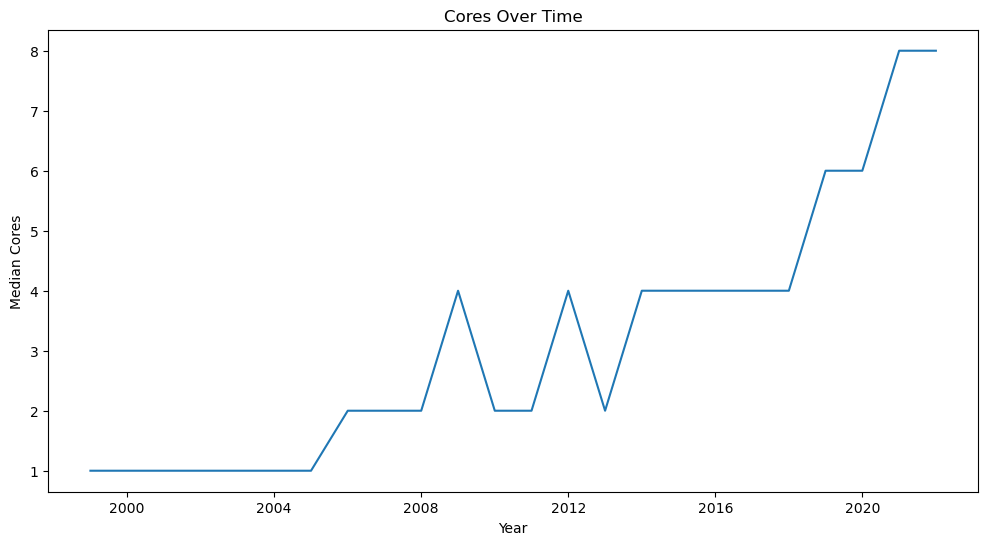

In [538]:
# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_med_cores['Year'], yearly_med_cores['MedianCores'])
x = mdates.date2num(yearly_med_cores["Year"])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Cores')
plt.title('Cores Over Time')
plt.show()

In [539]:
result = adfuller(yearly_med_cores["MedianCores"])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")


if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is NOT stationary. Consider differencing.")

ADF Statistic: 2.293342868156535
P-Value: 0.998950915396101
The data is NOT stationary. Consider differencing.


<p>We can see a generalized upward trend over time. As such, we will attempt to differentiate the results</p>

In [540]:
yearly_med_cores['MedianCores'] = yearly_med_cores['MedianCores'].diff().dropna()
yearly_med_cores = yearly_med_cores.dropna()
print(yearly_med_cores)

         Year  MedianCores
1  2000-01-01          0.0
2  2001-01-01          0.0
3  2002-01-01          0.0
4  2003-01-01          0.0
5  2004-01-01          0.0
6  2005-01-01          0.0
7  2006-01-01          1.0
8  2007-01-01          0.0
9  2008-01-01          0.0
10 2009-01-01          2.0
11 2010-01-01         -2.0
12 2011-01-01          0.0
13 2012-01-01          2.0
14 2013-01-01         -2.0
15 2014-01-01          2.0
16 2015-01-01          0.0
17 2016-01-01          0.0
18 2017-01-01          0.0
19 2018-01-01          0.0
20 2019-01-01          2.0
21 2020-01-01          0.0
22 2021-01-01          2.0
23 2022-01-01          0.0


In [541]:
result = adfuller(yearly_med_cores["MedianCores"])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")


if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is NOT stationary. Consider differencing.")

ADF Statistic: -8.084696583087068
P-Value: 1.430235612925562e-12
The data is stationary.


<p>The data is now stationary, with a remarkably low p-value. We will now visualize these results

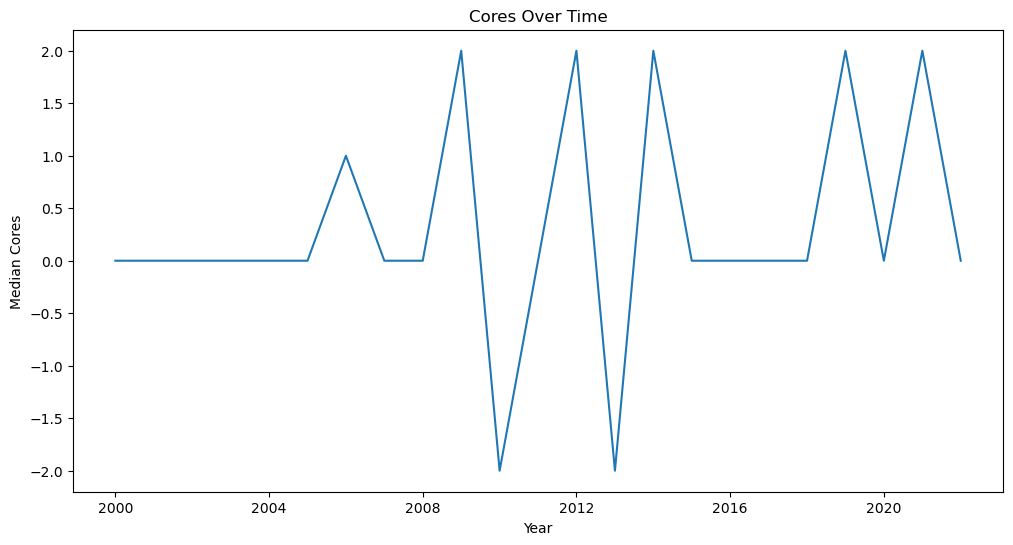

In [542]:
# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(yearly_med_cores['Year'], yearly_med_cores['MedianCores'])
x = mdates.date2num(yearly_med_cores["Year"])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Median Cores')
plt.title('Cores Over Time')
plt.show()

<p>With the data rendered stationary, we can now split the dataset into a test and training set, which is the last step before analyzing the data.</p>

In [543]:
# Define the features and target
X = yearly_med_cores[['Year']]
y = yearly_med_cores['MedianCores']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

<h4 id="D">Analysis</h4>
<p>Now, the data is fully prepared and we can create the time-series analysis. We will perform an ARIMA model to forecast the median cores over time. The steps are as follows:</p>
<ol>
<li>Identify ideal ARIMA function: We will generate the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to determine which ARIMA function would be optimal for this dataset.</li>
<li>Fit model to training dataset: We will create the model and use the training dataset to teach the model to recognize patterns within the data.</li>
<li>Undifferentiate the data: Undo the effect of the differentiation function, to analyze the outcomes over time</li>
<li>Test data on testing dataset: The model will attempt to identify the values of years that it has not seen, using the testing dataset. These attempts will be used to evaluate the model performance on data that it had not previously been exposed to</li>
<li>Calculate the evaluation metrics: We will calculate the mean average percent error from the tests we performed, to provide a numerical evaluation of the model's performance</li>
</ol>
<p>This approach comes with a few advantages, primarily the fact that it incorporates objective, verifiable ways to judge the performance. There is not going to be any uncertainty regarding whether the generated model is sufficiently accurate or if it was overfit. We will be able to clearly, numerically determine the performance of the model and determine if the accuracy is sufficient to prove the null or alternate hypothesis. <br />
There is a disadvantage with this approach, though. We will need 

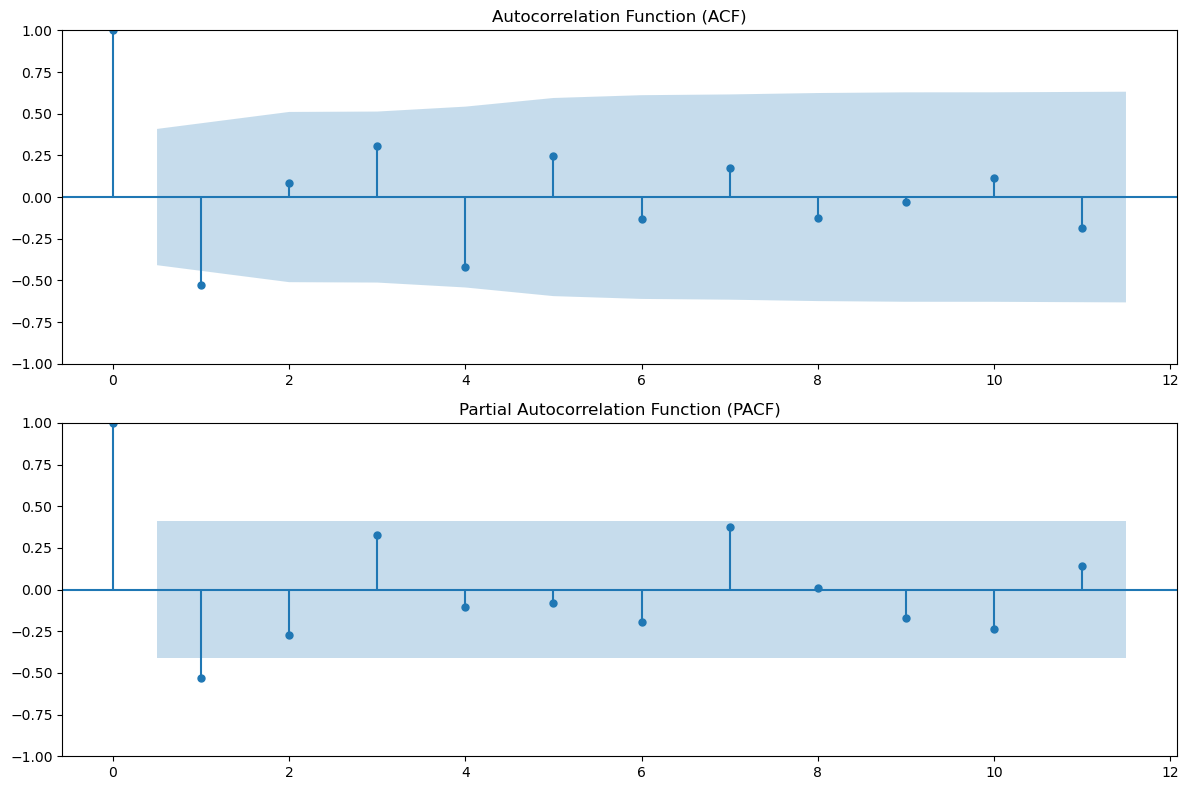

In [544]:
# Plotting the ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(yearly_med_cores['MedianCores'], ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(yearly_med_cores['MedianCores'], ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

<p>The significant decrease in the ACF and PACF after value 0 indicates that we should utilize an AR(1) function for this analysis. Therefore, when creating the ARIMA model, we will set the order parameter to be (1, 0, 0)</p>

In [545]:
# Fit an AR(1) model
model = ARIMA(y_train, order=(1, 0, 0))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            MedianCores   No. Observations:                   18
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -22.708
Date:                Wed, 19 Feb 2025   AIC                             51.416
Time:                        17:34:31   BIC                             54.087
Sample:                             0   HQIC                            51.784
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1738      0.136      1.273      0.203      -0.094       0.441
ar.L1         -0.5822      0.150     -3.892      0.000      -0.875      -0.289
sigma2         0.7133      0.268      2.661      0.0

/usr/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


        Year  Actual  Predicted
0 2018-01-01     3.0   3.274937
1 2019-01-01     5.0   3.389800
2 2020-01-01     5.0   3.597861
3 2021-01-01     7.0   3.751661
4 2022-01-01     7.0   3.937052


/usr/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


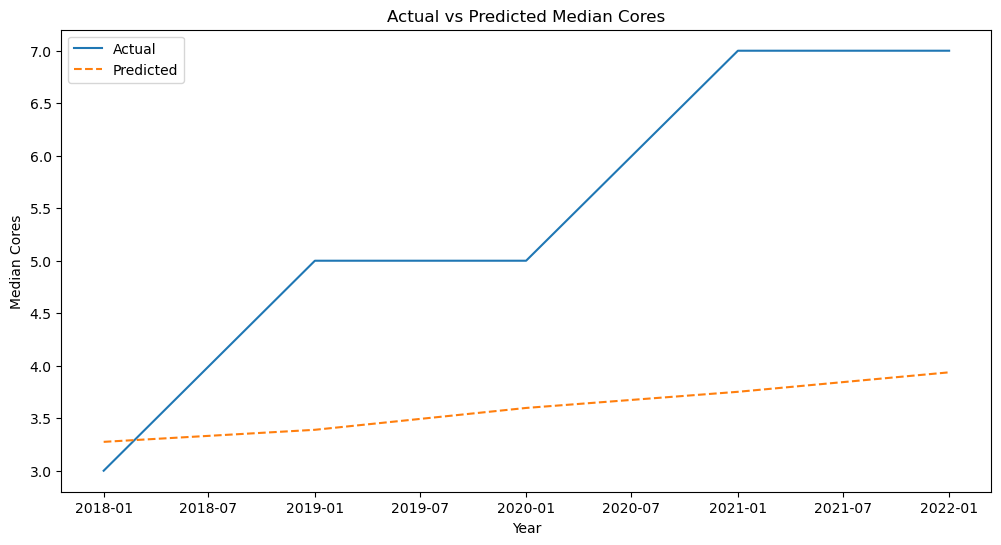

In [546]:
# Forecast the values
forecast = model_fit.forecast(steps=len(X_test)).dropna()
# Undifferentiate the forecasted values
predicted_cores = [y_train.cumsum().iloc[-1]]
for change in forecast:
    predicted_cores.append(predicted_cores[-1] + change)
# Adjust the forecast to align with the actual values
# Create a DataFrame to compare the actual and predicted values
comparison_df = pd.DataFrame({
    'Year': X_test['Year'].iloc[0:].reset_index(drop=True),
    'Actual': y_test.cumsum().iloc[0:].reset_index(drop=True) + y_train.cumsum().iloc[-1],
    'Predicted': predicted_cores[1:]
})

print(comparison_df)

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Year'], comparison_df['Actual'], label='Actual')
plt.plot(comparison_df['Year'], comparison_df['Predicted'], label='Predicted', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Median Cores')
plt.title('Actual vs Predicted Median Cores')
plt.legend()
plt.show()


In [547]:
# Calculate MAPE
mape = np.mean(np.abs((comparison_df['Actual'] - comparison_df['Predicted']) / comparison_df['Actual'])) * 100
print(f"MAPE: {mape}%")

MAPE: 31.914515598204225%
